# Predicting Wine Quality with k-Nearest Neighbours

In [1]:
# import the desired packages
import numpy as np
import pandas as pd

Building a k-Nearest Neighbours classifier in Python for “winequality-white.csv” :

**1. load the data file**

In [205]:
# specify the name of the columns and remove the header
wine_df = pd.read_csv('/Users/macbookpro/Desktop/Machine Learning/Assignments/Assignment 1/winequality-white 2022.csv'
                      , sep = ';',  header=0, names = ["fixed acidity","volatile acidity","citric acid",
                     "residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH",
                     "sulphates","alcohol","quality"])
# output the first 5 rows of the dataframe
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [206]:
# check the shape of the dataframe
wine_df.shape

(4898, 12)

In [207]:
# only use the first 800 instances of the table
wine_df = wine_df[:800]
# check the shape of our cut dataset
wine_df.shape

(800, 12)

**2. construct a new binary column “good wine” that indicates whether the wine is good (which we define as having a quality of 6 or higher) or not**

In [208]:
# add a new column following the above condition
wine_df['good wine'] = wine_df.quality.apply(lambda x: 1 if x >= 6 else 0)
# check the transformed table
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [209]:
# check the number of good wine
wine_df.groupby('good wine').count()['quality']

good wine
0    667
1    133
Name: quality, dtype: int64

**3. split the data set into a training data set (first 400 samples), a validation data set (next 200 samples) and a test data set (last 200 samples)**

In [210]:
# generate X and y data sets from the original wine_df
X = wine_df.loc[:, ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                    "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = wine_df.loc[: ,['good wine']]
# training data set
X_train = X[:400]
y_train = y[:400]
# validation data set
X_validation = X[400:600]
y_validation = y[400:600]
# test data set
X_test = X[600:]
y_test = y[600:]
# we will now check the shape of each set
print('The length of the training set is ', X_train.shape[0])
print('The length of the validation set is ', X_validation.shape[0])
print('The length of the test set is ', X_test.shape[0])

The length of the training set is  400
The length of the validation set is  200
The length of the test set is  200


**4. normalise the data according to the Z-score transform**

In [211]:
# we will use the StandardScaler function available in the sklearn package
import math 
from sklearn.preprocessing import StandardScaler

# the fit method in StandardScaler compute the mean and stdv of the training sample for later use
zscore = StandardScaler() # for less repetition we define the variable zscore as StandardScaler()
zscore.fit(X_train) # compute mean and stdv
print('The mean of each column are:', zscore.mean_)
print('The stdv of each column are:', [round(math.sqrt(i),2) for i in zscore.var_])

# we can now normalise the dataset using the compited mean and stdv using the transform method
scaled_X_train_array = zscore.transform(X_train) # produce a scaled array
# transform the array into a datafra
X_train_scaled = pd.DataFrame(scaled_X_train_array, index=X_train.index, columns=X_train.columns) 

# we will now do the same for the validation set
scaled_X_validation_array = zscore.transform(X_validation) # produce a scaled array
# transform the array into a datafra
X_validation_scaled = pd.DataFrame(scaled_X_validation_array, index=X_validation.index, columns=X_validation.columns) 

# we will now do the same for the test set
scaled_X_test_array = zscore.transform(X_test) # produce a scaled array
# transform the array into a datafra
X_test_scaled = pd.DataFrame(scaled_X_test_array, index=X_test.index, columns=X_test.columns) 
X_train_scaled

The mean of each column are: [ 8.43025    0.5419375  0.273725   2.55125    0.0962125 15.08125
 53.825      0.9972815  3.3066     0.7016    10.0005   ]
The stdv of each column are: [1.8, 0.17, 0.21, 1.28, 0.06, 9.38, 34.47, 0.0, 0.16, 0.23, 0.93]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.570821,0.903848,-1.302591,-0.509848,-0.315173,-0.434997,-0.575182,0.318487,1.311878,-0.628045,-0.646278
1,-0.349197,1.933141,-1.302591,0.038165,0.027872,1.057183,0.382246,-0.295760,-0.687542,-0.095803,-0.215785
2,-0.349197,1.246946,-1.112240,-0.196698,-0.065685,-0.008660,0.005077,-0.172910,-0.300558,-0.228864,-0.215785
3,1.534609,-1.497836,1.362313,-0.509848,-0.330766,0.204509,0.179155,0.441336,-0.945532,-0.539338,-0.215785
4,-0.570821,0.903848,-1.302591,-0.509848,-0.315173,-0.434997,-0.575182,0.318487,1.311878,-0.628045,-0.646278
...,...,...,...,...,...,...,...,...,...,...,...
395,1.977857,-0.983190,2.314064,1.290768,-0.471102,-0.861334,-0.459130,1.915527,-0.558548,-0.450631,3.228163
396,-1.014069,1.103989,-1.207415,4.187412,0.402104,5.640308,2.035984,1.301281,1.053888,-0.761105,-0.108161
397,1.700827,0.274836,1.505076,0.038165,-0.143650,-0.221829,-0.139987,0.932733,-0.816537,-0.228864,1.075696
398,1.700827,0.274836,1.505076,0.038165,-0.143650,-0.221829,-0.139987,0.932733,-0.816537,-0.228864,1.075696


**6. load and train the k-Nearest Neighbours classifiers for k = 1, 2, . . . , 100 and evaluate each classifier using the validation data set and select the best classifier**

The best classifier is for k = 15 with accuracy 89.0 %


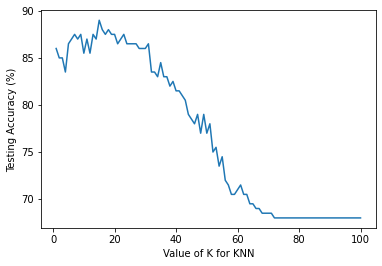

In [212]:
# we will use the KNeighborsClassifier function available in the sklearn package
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

cor_class_list = [] # initialise an empty list that will iteratively be appended the % of correclty classified items
k_range = [i for i in range(1,101)] # list containing values of k from 1 to 100
for k in k_range: # for loop going through all the values of k at a time
    KNN = KNeighborsClassifier(n_neighbors = k) # initialise a new KNeighborsClassifier for the value of k
    KNN.fit(X_train_scaled,y_train.values.ravel()) # fit the model with the normalised training data 
    prediction = KNN.predict(X_validation_scaled) # predict the validation set using the trained model
    # find the number of correctly predicted data and divide by the total number of rows and append to cor_class_list 
    cor_class_list.append(np.count_nonzero(prediction == y_validation.values.ravel())/len(y_validation.values.ravel())*100)

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1,101), cor_class_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for k =', k_range[cor_class_list.index(max(cor_class_list))], 'with accuracy', 
      max(cor_class_list), '%')

**7. predict the generalisation error using the test data set.**

The generalisation error is 3.5 %
              precision    recall  f1-score   support

    bad wine       0.96      1.00      0.98       187
   good wine       1.00      0.46      0.63        13

    accuracy                           0.96       200
   macro avg       0.98      0.73      0.81       200
weighted avg       0.97      0.96      0.96       200



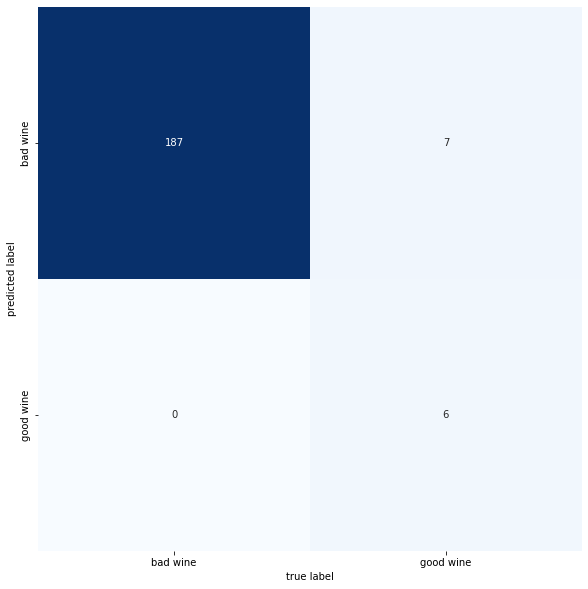

In [213]:
# the generalisation error is what percentage of the test samples is correctly classified for the optimal k
# plot the confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

k = k_range[cor_class_list.index(max(cor_class_list))] # find the k with the best % of predicted data
KNN = KNeighborsClassifier(n_neighbors = k) # create a new model using the previously found k
KNN.fit(X_train_scaled,y_train.values.ravel()) # train the data with the training set
prediction = KNN.predict(X_test_scaled) # predict the test set
# calculate the generalisation error 
generalisation_error = 100 - np.count_nonzero(prediction == y_test.values.ravel())/len(y_test.values.ravel())*100
print('The generalisation error is', generalisation_error, '%') # print the generalisation error
fig, ax = plt.subplots(figsize=(10,10)) # set the figure plot
mat = confusion_matrix(y_test, prediction) # set the matrix row as the true label and the column as the predicted
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = ['bad wine', 'good wine'],
            yticklabels = ['bad wine', 'good wine'], cmap="Blues")
plt.xlabel('true label') # set the x axis label
plt.ylabel('predicted label')# set the y axis label
print(classification_report(y_test, prediction, target_names=['bad wine', 'good wine']))

**8. Try a new splitting: split the data set into a training data set (first 200 samples), a validation data set (next 200 samples), and a test data set (last 400 samples) - again, please do not shuffle the data. Then redo steps 4 to 6.**

The length of the training set is  200
The length of the validation set is  200
The length of the test set is  400
The mean of each column are: [ 7.594      0.57435    0.215      2.368      0.098895  15.61
 60.53       0.9966245  3.33455    0.6793     9.8465   ]
The stdv of each column are: [1.01, 0.18, 0.18, 1.21, 0.07, 9.37, 38.0, 0.0, 0.16, 0.27, 0.84]
The best classifier is for k = 1 with accuracy 85.0 %
The generalisation error is 15.0 %
              precision    recall  f1-score   support

    bad wine       0.89      0.92      0.91       323
   good wine       0.63      0.55      0.58        77

    accuracy                           0.85       400
   macro avg       0.76      0.73      0.75       400
weighted avg       0.84      0.85      0.85       400



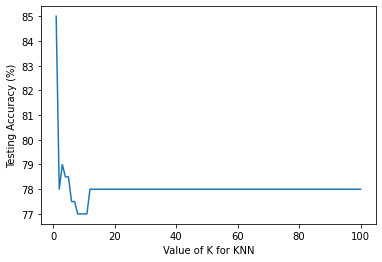

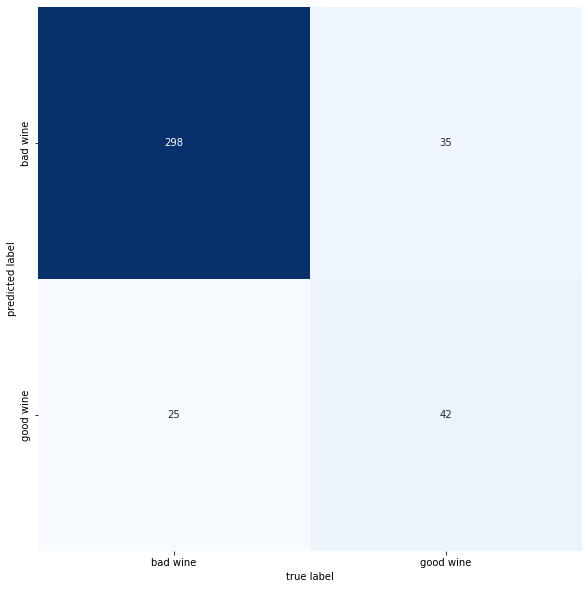

In [214]:
# generate X and y data sets from the original wine_df
X = wine_df.loc[:, ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
                    "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]
y = wine_df.loc[: ,['good wine']]
# training data set
X_train = X[:200]
y_train = y[:200]
# validation data set
X_validation = X[200:400]
y_validation = y[200:400]
# test data set
X_test = X[400:]
y_test = y[400:]
# we will now check the shape of each set
print('The length of the training set is ', X_train.shape[0])
print('The length of the validation set is ', X_validation.shape[0])
print('The length of the test set is ', X_test.shape[0])
# the fit method in StandardScaler compute the mean and stdv of the training sample for later use
zscore = StandardScaler() # for less repetition we define the variable zscore as StandardScaler()
zscore.fit(X_train) # compute mean and stdv
print('The mean of each column are:', zscore.mean_)
print('The stdv of each column are:', [round(math.sqrt(i),2) for i in zscore.var_])

# we can now normalise the dataset using the compited mean and stdv using the transform method
scaled_X_train_array = zscore.transform(X_train) # produce a scaled array
X_train_scaled = pd.DataFrame(scaled_X_train_array, index=X_train.index, columns=X_train.columns) 

# we will now do the same for the validation set
scaled_X_validation_array = zscore.transform(X_validation) # produce a scaled array
X_validation_scaled = pd.DataFrame(scaled_X_validation_array, index=X_validation.index, columns=X_validation.columns) 

# we will now do the same for the test set
scaled_X_test_array = zscore.transform(X_test) # produce a scaled array
X_test_scaled = pd.DataFrame(scaled_X_test_array, index=X_test.index, columns=X_test.columns)
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
cor_class_list = []
k_range = [i for i in range(1,101)]
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k)
    KNN.fit(X_train_scaled,y_train.values.ravel())
    prediction = KNN.predict(X_validation_scaled)
    cor_class_list.append(np.count_nonzero(prediction == y_validation.values.ravel())/len(y_validation.values.ravel())*100)

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1,101), cor_class_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy (%)')
print('The best classifier is for k =', k_range[cor_class_list.index(max(cor_class_list))], 'with accuracy',
      max(cor_class_list), '%')

# the generalisation error is what percentage of the test samples is correctly classified for the optimal k
from sklearn.metrics import confusion_matrix
import seaborn as sns
k = k_range[cor_class_list.index(max(cor_class_list))]
KNN = KNeighborsClassifier(n_neighbors = k)
KNN.fit(X_train_scaled,y_train.values.ravel())
prediction = KNN.predict(X_test_scaled)
generalisation_error = 100 - np.count_nonzero(prediction == y_test.values.ravel())/len(y_test.values.ravel())*100
print('The generalisation error is', generalisation_error, '%')
fig, ax = plt.subplots(figsize=(10,10)) # set the figure plot
mat = confusion_matrix(y_test, prediction) # set the matrix row as the true label and the column as the predicted
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = ['bad wine', 'good wine'],
            yticklabels = ['bad wine', 'good wine'], cmap="Blues")
plt.xlabel('true label') # set the x axis label
plt.ylabel('predicted label')# set the y axis label
print(classification_report(y_test, prediction, target_names=['bad wine', 'good wine']))

The new generalisation error (15%) is higher than the one computed earlier (3.5%). This is expected because in this part of the question, significantly fewer data points are used to train the algorithm. With fewer training data points, when we attempt to predict the 'wine goodness' of a new data point, the distances to the nearest neighbours are likely larger than the case where we have more data points. Hence, we make the prediction on the basis of neighbors that are not as close to the new data point as the neighbors we'd get if we used more training data points. This explains why the prediction accuracy decreases (or alternatively the generelisation error increases) when fewer training data points are used. We also notice that the most suitable k in this part of the problem is smaller than the k value used earlier. This also makese sense since the algorithm becomes more sensitive to bias as the size of the training data decreases. As the size of the training data decreases, the distances to nearest neighbours tend to increase, and so the bias increases (the predicted value is biased towards neighbours that are not as close to the new data point as they would be if more training data points were used). As such, choosing a smaller k is needed to avoid predicting the classification for the new data point on the basis of neighbours that are too far away from the data point. Finally, The best way to judge if a classifier is well suited for a data set is by trying out different classifiers on the data set and choosing the one that results in the lowest generalisation error.